In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def int_to_binary_arr (n):
    arr = np.zeros (10)
    i = 0
    while (n > 0):
        arr[i] = (n % 2)
        i += 1
        n //= 2
    return arr[::-1]


# Plots E_in and E_val
def plot_error (n, errors_list, labels_list):
    ax = plt.gca ()
    x = range (1, n + 1)
    for i, error_t in enumerate (errors_list):
        plt.plot (x, error_t, label = labels_list[i])    
    handlers, labels = ax.get_legend_handles_labels ()
    ax.legend (handlers, labels, loc = 'upper right', numpoints = 1)
    plt.ylabel ('Relative error')
    plt.xlabel ('Number of images sampled x5000')
    plt.show ()
    plt.clf ()
    
    
# Given a set of size N, returns a random partition of this set
# containing two subsets of size N - k and k
def validation_partition (data_set, k):
    np.random.shuffle (data_set)
    return (data_set[k:], data_set[:k])


# Calculates error of a data set
def avg_error (data_set, X, Y, cost):
    data_set_size = data_set.shape[0]
    err = 0
    for i in range (data_set_size):
        features = np.empty ([1, features_size])
        features[0, :] = data_set[i, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (data_set[i, 0])
            
        # Forward propagation and error calculation
        e = sess.run (cost, {X: features, Y: label})
        err += e
    return err / data_set_size

# MAC0460/5832 - Lista 3: Redes Neurais - MNIST

### Data de Entrega: 23h55m do dia 23/06/2017

##### Classificação de dígitos
Os dataset para esta tarefa foi tirado da competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, mas os dados estão inalterados. Cada linha (amostra) do arquivo contém 785 colunas: a primeira informa o label da amostra e as outras 784 são os valores dos pixels da imagem (28 x 28) que representa o dígito.

Q1. Projete uma rede neural para resolver o problema de classificação de dígitos. Baixe o arquivo train.csv.gz (link acima) e dezipe-o para a pasta data/. Verifique que as células abaixo executam com sucesso e exibem o resultado esperado. Utilize os pacotes de python tensorflow (https://www.tensorflow.org/) ou theano (http://deeplearning.net/software/theano/) para implementar sua rede neural. Escolha o que preferir/tiver mais familiaridade - ou o quiser passar a ter mais familiaridade :) - para definir sua rede neural. Usem a arquitetura 3-layer NN 300+100 hidden units (erro 3.05%), como descrito no site http://yann.lecun.com/exdb/mnist/index.html.


Façam os três seguintes experimentos:

1. Imagem original.
2. Imagem amostrada com passo 1, isto é, reduz a imagem para 1/4 do número total de pixels.
3. Imagem amostrada com passo 2, isto é, reduz a imagem para 1/16 do número total de pixels.


Em cada experimento, execute os seguintes procedimentos:
1. Compute a curva experimental de aprendizado (N = 5000, N = 10000, N = 15000, ... N = 35000), estimar o $E_{out}$ a partir das 7000 amostras não usadas.
2. Para N = 35000 (isto é, separe 7000 amostras para validação), calcule o valor da precisão $\epsilon = E_{out} - E_{in}$.
3. Adote o valor de $\epsilon$ calculado em 2; repita dez vezes o experimento de aprendizado para $N = 35000$ e 7000 amostras de validação (em cada experimento, escolha aleatoriamente entre as 42000 amostras 7000 para formar o conjunto de validação e as restantes para treinamento); calcule o $E_{out}$ para cada um dos experimentos; a partir dos $E_{out}$ calculados, estime o valor do parâmetro $\delta$.
4. Comente os resultados obtidos.

Adote *learning rate* $\eta = 0.001$.
Para o item 3, lembre da equação $P(|E_{out}(h_{opt}) - E_{in}(h_{opt})| < \epsilon) > 1 - \delta$.

In [2]:
########################################################################
data = np.genfromtxt('data/train.csv', delimiter=',', skip_header=1).astype(np.dtype('uint8'))
print (data.shape)

(42000, 785)


5000 iterations complete on training! E_in = 0.909794547129 E_out = 0.912045146678
10000 iterations complete on training! E_in = 0.806626099035 E_out = 0.807327847804
15000 iterations complete on training! E_in = 0.792700031626 E_out = 0.791277621371
20000 iterations complete on training! E_in = 0.779283189985 E_out = 0.781317652868
25000 iterations complete on training! E_in = 0.772958329874 E_out = 0.77067287116
30000 iterations complete on training! E_in = 0.766106715048 E_out = 0.76600527631
35000 iterations complete on training! E_in = 0.760410732432 E_out = 0.76036377493


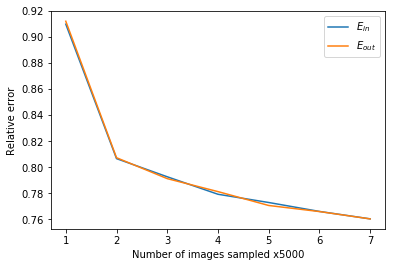

Epsilon = 4.69575021947e-05
Estimating delta...
Iteration 1 had epsilon = 0.0013312582744.
Iteration 2 had epsilon = 0.00343230796541.
Iteration 3 had epsilon = 0.00466454844049.
Iteration 4 had epsilon = 0.000284595458848.
Iteration 5 had epsilon = 0.000944402593374.
Iteration 6 had epsilon = 9.13468982492e-05.
Iteration 7 had epsilon = 0.00544050819363.
Iteration 8 had epsilon = 0.00135168608853.
Iteration 9 had epsilon = 0.00229245763506.
Iteration 10 had epsilon = 0.00495083400522.
Estimated delta = 1.0


In [10]:
########################################################################
# experimento 1
global features_size
global output_size
features_size = 784
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')
learning_rate = 0.001


# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (300, 100)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = \
    tf.train.GradientDescentOptimizer (learning_rate).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if ((i + 1) % 5000 == 0):
        # Calculates e_in
        e_in = avg_error (data[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)
        
        print (str (i + 1) + " iterations complete on training!" + 
               " E_in = " + str (e_in) + 
               " E_out = " + str (e_out))

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

Podemos observar que o modelo generaliza bem porque apresenta epsilon pequeno.

O delta estimado foi alto, o que pode parecer significar que o modelo não generaliza bem na maioria dos casos. Porém, como o valor epsilon foi escolhido arbitrariamente o valor de delta não implica na generalização ruim do modelo. Inclusive, como pudemos observar acima, o epsilon utilizado era próximo de $10^{-3}$ e em todas as outras iterações o valor de $|E_{in} - E_{out}|$ foi menor do que $10^{-2}$, logo podemos confirmar que o modelo generaliza bem.

In [11]:
data_step1 = np.zeros ([42000, 197])
data_step1[:, 0] = data[:, 0]
for i in range (42000):
    img_data = data[i, 1:]
    img_data = img_data.reshape ([28, 28])
    img_data = img_data[::2, ::2]
    img_data = img_data.reshape ([196])
    data_step1[i, 1:] = img_data
print (data_step1.shape)

(42000, 197)


5000 iterations complete on training! E_in = 0.882703070819E_out = 0.89213971132
10000 iterations complete on training! E_in = 0.813064133936E_out = 0.819788373513
15000 iterations complete on training! E_in = 0.788848640583E_out = 0.792605924849
20000 iterations complete on training! E_in = 0.773276065724E_out = 0.77650880545
25000 iterations complete on training! E_in = 0.763732854846E_out = 0.765666988173
30000 iterations complete on training! E_in = 0.75832013315E_out = 0.757479300644
35000 iterations complete on training! E_in = 0.754576272916E_out = 0.756388473834


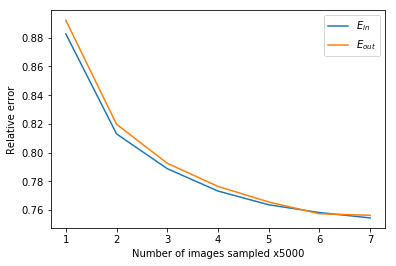

Epsilon = 0.00181220091837
Estimating delta...
Iteration 1 had epsilon = 0.001291561988.
Iteration 2 had epsilon = 0.00253034330862.
Iteration 3 had epsilon = 0.00874078735454.
Iteration 4 had epsilon = 0.0028393253071.
Iteration 5 had epsilon = 0.00123509549584.
Iteration 6 had epsilon = 0.00149987524833.
Iteration 7 had epsilon = 0.00148205887505.
Iteration 8 had epsilon = 0.00162754975642.
Iteration 9 had epsilon = 0.00435804861614.
Iteration 10 had epsilon = 0.00179111112441.
Estimated delta = 0.4


In [13]:
features_size = 196
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')
learning_rate = 0.001


# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (300, 100)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = \
    tf.train.GradientDescentOptimizer (learning_rate).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data_step1[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data_step1[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if ((i + 1) % 5000 == 0):
        # Calculates e_in
        e_in = avg_error (data_step1[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data_step1[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)
        
        print (str (i + 1) + " iterations complete on training! " + 
               "E_in = " + str (e_in) + 
               "E_out = " + str (e_out))

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data_step1, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

In [14]:
data_step2 = np.zeros ([42000, 50])
data_step2[:, 0] = data[:, 0]
for i in range (42000):
    img_data = data[i, 1:]
    img_data = img_data.reshape ([28, 28])
    img_data = img_data[::4, ::4]
    img_data = img_data.reshape ([49])
    data_step2[i, 1:] = img_data
print (data_step2.shape)

(42000, 50)


5000 iterations complete on training! E_in = 0.892087619132E_out = 0.89767197881
10000 iterations complete on training! E_in = 0.830727898571E_out = 0.832384293522
15000 iterations complete on training! E_in = 0.79515293775E_out = 0.796320685834
20000 iterations complete on training! E_in = 0.781529174443E_out = 0.781504076025
25000 iterations complete on training! E_in = 0.766839803853E_out = 0.768284682389
30000 iterations complete on training! E_in = 0.76037783768E_out = 0.759987668638
35000 iterations complete on training! E_in = 0.756687068591E_out = 0.75814632288


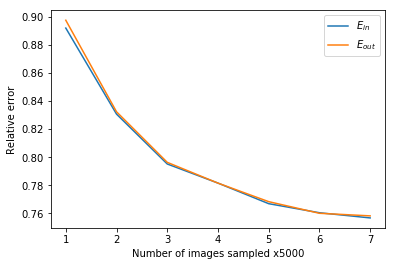

Epsilon = 0.00145925428952
Estimating delta...
Iteration 1 had epsilon = 0.000116781853778.
Iteration 2 had epsilon = 0.00339009807323.
Iteration 3 had epsilon = 0.00719855416247.
Iteration 4 had epsilon = 0.00613607862932.
Iteration 5 had epsilon = 0.00695560957023.
Iteration 6 had epsilon = 0.00643624377251.
Iteration 7 had epsilon = 0.00679416246244.
Iteration 8 had epsilon = 0.00496546153256.
Iteration 9 had epsilon = 0.00763239904216.
Iteration 10 had epsilon = 0.00920713378021.
Estimated delta = 0.9


In [15]:
features_size = 49
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')
learning_rate = 0.001

# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (300, 100)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = \
    tf.train.GradientDescentOptimizer (learning_rate).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data_step2[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data_step2[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if ((i + 1) % 5000 == 0):
        # Calculates e_in
        e_in = avg_error (data_step2[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data_step2[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)
        
        print (str (i + 1) + " iterations complete on training! " + 
               "E_in = " + str (e_in) + 
               "E_out = " + str (e_out))

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data_step2, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

Podemos observar que os três modelos tiveram desempenho parecido quanto ao valor estimado de E_out. Além disso, vemos que a curva E_in e E_out andam muito próximas desde as 5000 imagens amostradas, o que indica que a nossa hipótese generaliza bem no espaço de amostras.

Apesar de generalizar bem, nossos três modelos possuem E_out grande. Isso aconteceu porque o $\eta$ que utilizamos é pequeno comparado ao número de iterações de treinamento feitas. No modelo descrito em http://yann.lecun.com/exdb/mnist/index.html a rede neural é treinada com todas as amostras 20 vezes, sendo que 

<br>
<center>
    $$
        \begin{cases}
            \eta = 0.0005 \text{ para }  i = 1, 2  \\
            \eta = 0.0002 \text{ para }  i = 3, 4, 5 \\
            \eta = 0.0001 \text{ para }  i = 6, 7, 8 \\
            \eta = 0.00005 \text{ para }  i = 9, 10, 11, 12 \\
            \eta = 0.00001 \text{ para }  i = 13, \dots, 20 \\
        \end{cases}
    $$
</center> 

enquanto nossa rede é treinada apenas uma vez com $\eta = 0.001$, metade do que foi usado nas duas primeiras iterações do modelo que usamos como referência.

Resolvemos então, rodar o primeiro experimento novamente com $\eta = 0.01$.

5000 iterations complete on training! E_in = 0.73620445748 E_out = 0.733913361579
10000 iterations complete on training! E_in = 0.680286508939 E_out = 0.682276639014
15000 iterations complete on training! E_in = 0.574645705644 E_out = 0.573405761081
20000 iterations complete on training! E_in = 0.203977255415 E_out = 0.20312504068
25000 iterations complete on training! E_in = 0.16541361549 E_out = 0.165400891177
30000 iterations complete on training! E_in = 0.161101955678 E_out = 0.161776469863
35000 iterations complete on training! E_in = 0.157729355426 E_out = 0.158119465946


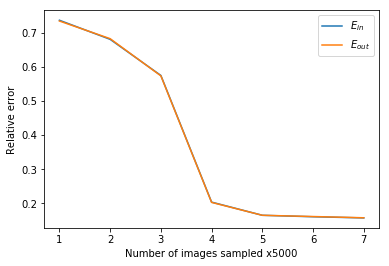

Epsilon = 0.000390110519914
Estimating delta...
Iteration 1 had epsilon = 0.000244792369008.
Iteration 2 had epsilon = 0.00111032184448.
Iteration 3 had epsilon = 0.00140736600629.
Iteration 4 had epsilon = 0.000746602133768.
Iteration 5 had epsilon = 0.000771959239244.
Iteration 6 had epsilon = 0.000254752007978.
Iteration 7 had epsilon = 0.000685737441267.
Iteration 8 had epsilon = 0.00329911249237.
Iteration 9 had epsilon = 0.00209102475175.
Iteration 10 had epsilon = 0.000811801467623.
Estimated delta = 0.8


In [18]:
########################################################################
# experimento 1
global features_size
global output_size
features_size = 784
output_size = 10
X = tf.placeholder ("float", [None, features_size], name = 'X')
Y = tf.placeholder ("float", [None, output_size], name = 'Y')

# New Learning Rate #
learning_rate = 0.01

# Defines our model
def createNN (hidden1_size, hidden2_size):
        """ Creates a NN with 2 hidden layers.
            There are 4 layers on total therefore  0 <= l < 4. """
        # dl = dimension of layer l
        d0 = features_size
        d1 = hidden1_size
        d2 = hidden2_size
        d3 = output_size
        
        # Wl = matrix of weights of level (l - 1) => l
        W1 = tf.Variable (tf.random_uniform ([d0, d1], -1, 1))
        W2 = tf.Variable (tf.random_uniform ([d1, d2], -1, 1))
        W3 = tf.Variable (tf.random_uniform ([d2, d3], -1, 1))
        # bl = bias of level (l - 1) => l
        b1 = tf.Variable (tf.random_uniform ([d1], -1, 1))
        b2 = tf.Variable (tf.random_uniform ([d2], -1, 1))
        b3 = tf.Variable (tf.random_uniform ([d3], -1, 1))
        
        
        # sl = signal coming from level l
        # xl = x that comes from level
        # these represents the actual structure of the NN
        x0 = X
        s0 = tf.add (tf.matmul (x0, W1), b1)
        x1 = tf.tanh (s0)
        
        s1 = tf.add (tf.matmul (x1, W2), b2)
        x2 = tf.tanh (s1)
        
        s2 = tf.add (tf.matmul (x2, W3), b3)
        h_y = tf.tanh (s2)
        return h_y

h_y = createNN (300, 100)
cost = tf.reduce_mean (tf.square (Y - h_y))
optimizer = \
    tf.train.GradientDescentOptimizer (learning_rate).minimize (cost)

init = tf.global_variables_initializer()
sess = tf.Session ()
sess.run (init)


# Train model
e_in_arr = []
e_out_arr = []
for i in range (35000):
    features = np.empty ([1, features_size])
    features[0, :] = data[i, 1:]
    label = np.empty ([1, output_size])
    label[0, :] = int_to_binary_arr (data[i, 0])
    
    # SGD iteration
    _, err = sess.run ([optimizer, cost], {X: features, Y: label})
    
    if ((i + 1) % 5000 == 0):
        # Calculates e_in
        e_in = avg_error (data[:i + 1, :], X, Y, cost)
        e_in_arr.append (e_in)
        
        # Calculates e_out
        e_out = avg_error (data[35000:, :], X, Y, cost)
        e_out_arr.append (e_out)
        
        print (str (i + 1) + " iterations complete on training!" + 
               " E_in = " + str (e_in) + 
               " E_out = " + str (e_out))

        
# Plots learning curve
labels_list = ['$E_{in}$', '$E_{out}$']
erros_list = [e_in_arr, e_out_arr]
plot_error (7, erros_list, labels_list)


# Prints epsilon
epsilon = abs (e_out_arr[-1] - e_in_arr[-1])
print ("Epsilon = "  + str (epsilon))


# Estimates delta
print ("Estimating delta...")
delta = .0
for i in range (10):
    sess.run (init)
    training_set, validation_set = validation_partition (data, 
                                                         42000 - 7000)
    
    for j in range (training_set.shape[0]):
        features = np.empty ([1, features_size])
        features[0, :] = training_set[j, 1:]
        label = np.empty ([1, output_size])
        label[0, :] = int_to_binary_arr (training_set[j, 0])
        # SGD iteration
        sess.run (optimizer, {X: features, Y: label})
    
    e_in = avg_error (training_set, X, Y, cost)
    e_out = avg_error (validation_set, X, Y, cost)
    
    if (abs (e_in - e_out) > epsilon):
        delta += 1.
    print ("Iteration " + str (i + 1) + " had epsilon = " +
           str (abs (e_in - e_out)) + ".")
delta /= 10
print ("Estimated delta = " + str (delta))

É possível ver que o desempenho desse modelo é bem melhor do que o modelo antigo. Além disso, apesar de aumentarmos a dimensão VC da rede neural ao aumentar o learning rate do algoritmo (como explicado no livro-texto) a generalização desse modelo ainda é boa.

Q2. O método de aprendizado adotado na questão anterior inclui regularização? Caso afirmativo, como? Caso negativo, como formularia a inclusão da regularização e porque esse procedimento melhoraria o resultado?

Não há regularização. Entretanto, os autores do trabalho em que nos inspiramos conjecturam que existe uma natureza auto-regularizadora na rede neural.

> It remains somewhat of a mystery that networks with such a large number of free parameters manage to achieve reasonably low testing errors. We conjecture that the dynamics of gradient descent learning in multilayer nets has a self-regularization" effect.
>
> -- Y. LeCun, et al.

Para adicionar regularização ao nosso modelo, podemos usar o augmented error ao invés de usar o erro no ponto avaliado. No caso do gradient descent, usamos

<br>
<center>
$ E_{aug} = E_{in} + \frac{\lambda}{N} \sum_{l, i, j}{(W_{ij}^{(l)})^2}$;
</center>

agora, no caso do stochastic gradient descent, podemos usar:

<br>
<center>
$ e_{aug} (h (x_n), y_n) = e (h (x_n), y_n) + {\lambda} \sum_{l, i, j}{(W_{ij}^{(l)})^2}$;
</center>


no qual $N$ é a quantidade de amostras e $\lambda$ é uma constante maior que zero que pode ser escolhida por validação.

A regularização não modifica nosso espaço de hipóteses, portanto a dimensão VC continua igual. Porém, com a regularização, mudamos o nosso algoritmo de otimização penalizando hipóteses mais complexas e, consequentemente, favorecendo as mais simples, que tendem a sofrer menos com os efeitos de sobreajuste.